In [34]:
import numpy as np
import matplotlib.pyplot as plt

In [87]:
sigma = lambda x: 1/(1+np.exp(-x))
sigma1 = lambda x: sigma(x)*(1-sigma(x))
sigma2 = lambda x: sigma1(x)*(1-2*sigma(x))
sigma3 = lambda x: sigma2(x)*(1-2*sigma(x))-2*(sigma1(x)**2)
sigmas = [sigma, sigma1, sigma2, sigma3]
ln2 = np.log(2)

In [46]:
a = np.log(2)
print(sigma(a), sigma1(a),sigma2(a), sigma3(a))

0.6666666666666666 0.22222222222222224 -0.07407407407407406 -0.0740740740740741


In [47]:
f = lambda x,c: np.sum([1/np.math.factorial(k)*sigmas[k](c)*(x-c)**k for k in range(4)])

In [270]:

X = np.linspace(-4,4,1000)
Y = [sigma(x) for x in X]
Z = [f(x,0) for x in X]
A = [f(x,np.log(2)) for x in X]

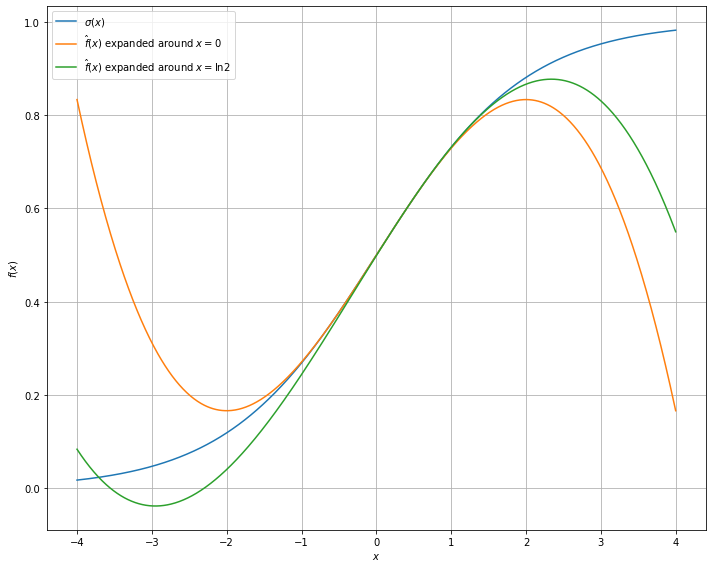

In [271]:
plt.figure(figsize=(10,8))
plt.plot(X,Y, label="$\sigma(x)$")
plt.plot(X,Z, label="$\hat{f}(x)$ expanded around $x=0$")
plt.plot(X,A, label="$\hat{f}(x)$ expanded around $x=\ln 2$")
plt.grid()
plt.legend()
plt.xlabel("$x$")
plt.ylabel("$f(x)$")
plt.tight_layout()

In [214]:
def alphas(c,A):
    a0=sigma(c)-c*sigma1(c)+sigma2(c)/2*((A**2)/2+c**2)-sigma3(c)/6*(3*(A**2)*c/2+c**3)
    a1=A*sigma1(c)-A*c*sigma2(c)+sigma3(c)/2*(A**3/4+A*c**2)
    a2=A**2/4*(sigma2(c)-c*sigma3(c))
    a3=A**3*sigma3(c)/24
    return a0,a1,a2,a3

In [201]:
print(alphas(0,1))

(0.4957431660179027, 0.234375, 0.0, -0.005208333333333333)


In [91]:
1/4-1/64

0.234375

In [284]:
# c = 0, A = 1
c = ln2
A = 3

In [285]:
N = 1000
t=np.arange(N)
sig = A*np.cos(t*2*np.pi/5)
fx_taylor = [f(x,c) for x in sig]
fx = [sigma(x) for x in sig]
a = alphas(c,A)
fx_alphas = np.sum([alpha*np.cos(i*t*2*np.pi/5) for i, alpha in enumerate(a)], axis=0)

In [286]:
freq = np.linspace(0, 0.5, N//2)
FX_taylor = np.abs(np.fft.fft(fx_taylor))[0:N//2]
FX = np.abs(np.fft.fft(fx))[0:N//2]
FX_alphas = np.abs(np.fft.fft(fx_alphas))[0:N//2]

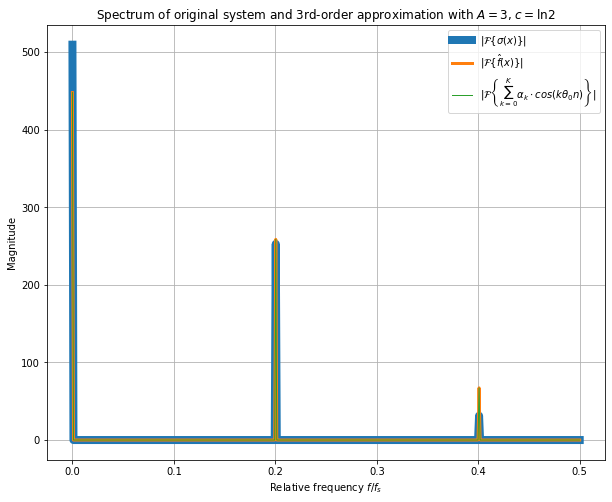

In [287]:
plt.figure(figsize=(10,8))
plt.plot(freq,FX, linewidth=8, label="$|\mathcal{F}\{\sigma(x)\}|$")
plt.plot(freq,FX_taylor, linewidth=3, label="$|\mathcal{F}\{\hat{f}(x)\}|$")
plt.plot(freq,FX_alphas, linewidth=1, label="$|\mathcal{F}\left \{\sum_{k=0}^{K}\\alpha_k \cdot cos(k\\theta_0 n)\\right\} |$")
plt.legend()
plt.xlabel("Relative frequency $f/f_s$")
plt.ylabel("Magnitude")
cstr = c if not c==ln2 else "\ln2"
plt.title(f"Spectrum of original system and 3rd-order approximation with $A={A}$, $c={cstr}$")
plt.grid()